# Gini Index Python Example

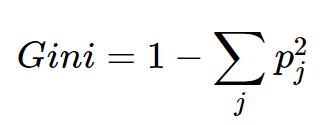

In [4]:
import pandas as pd
import math
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [5]:
ws_list = [1,2,2,3,1,3,3,2,3,2,1,3,2,3,3,2,1,2]
ek_list = ['ü','u','u','ü','u','u','ü','ü','ü','u','u','ü','ü','ü','u','u','u','u']
g_list = ['m','w','w','w','m','m','m','w','m','w','w','m','m','m','w','w','m','m']
k_list = ['n','n','y','y','y','y','n','n','n','n','y','n','n','n','y','n','y','y']
df= pd.DataFrame(list(zip(ws_list, ek_list, g_list, k_list)),
                  columns =['Wirtschaftssektor', 'Einkommen', 'Geschlecht', 'Krankheit'])
df

,Wirtschaftssektor,Einkommen,Geschlecht,Krankheit
0,1,ü,m,n
1,2,u,w,n
2,2,u,w,y
3,3,ü,w,y
4,1,u,m,y
5,3,u,m,y
6,3,ü,m,n
7,2,ü,w,n
8,3,ü,m,n
9,2,u,w,n


In [14]:
def calc_gini(df, column, condition, y):
    # Menge aller Tupel im Datensatz
    n_total = len(df.index)
    # Menge aller Tupel mit einer postiven Zielvariablen
    n_pos = 0
    for i in df.query(y + '== "y"').index:
        n_pos += 1
    # Menge aller Tupel mit einer negativen Zielvariablen
    n_neg = n_total - n_pos
    # Menge aller Tupel, welche die Bedingung erfüllen
    n_cond = 0;
    for i in df.query(column + ' == '+ condition).index:
        n_cond += 1
    #Menge aller Tupel, welche die Bedingung nicht erfüllen
    n_ncond = n_total - n_cond
    # Menge aller Tupel, welche die Bedingung erfüllen und bei denen die Zielvariable positiv ist
    n_condpos = 0
    for i in df.query(column + ' == '+ condition + ' & '+ y + ' == "y"').index:
        n_condpos += 1
    # Menge aller Tupel, welche die Bedingung erfüllen und bei denen die Zielvariable negativ ist
    n_condneg = n_cond - n_condpos
    # Menge aller Tupel, welche die Bedingung nicht erfüllen und bei denen die Zielvariable postiv ist
    n_ncondpos = n_pos - n_condpos
    # Menge aller Tupel, welche die Bedingung nicht erfüllen und bei denen die Zielvariable negativ ist
    n_ncondneg = n_neg - n_condneg
    
    print('Total: ' + str(n_total))
    print('Postiv: ' + str(n_pos))
    print('Negativ: ' + str(n_neg))
    print('Condition: ' + str(n_cond))
    print('Not Condition: ' + str(n_ncond))
    print('Condition Positiv: ' + str(n_condpos))
    print('Condition Negativ: ' + str(n_condneg))
    print('Not Condition Positiv: ' + str(n_ncondpos))
    print('Not Condition Negativ: ' + str(n_ncondneg))
    
    # Apply Gini Formula
    gini_cond = 1 - (math.pow(n_condpos/n_cond, 2) + math.pow(n_condneg/n_cond, 2))
    print('Gini Condition: ' + str(gini_cond))
    gini_ncond = 1 - (math.pow(n_ncondpos/n_ncond, 2) + math.pow(n_ncondneg/n_ncond, 2))
    print('Gini Not Condition ' + str(gini_ncond))
    gini_total = (gini_cond*(n_cond/n_total))+(gini_ncond*(n_ncond/n_total))
    print('Gini Total ' + str(gini_total))

In [9]:
calc_gini(df, 'Wirtschaftssektor', '1', 'Krankheit')

Total: 18
Postiv: 8
Negativ: 10
Condition: 4
Not Condition: 14
Condition Positiv: 3
Condition Negativ: 1
Not Condition Positiv: 5
Not Condition Negativ: 9
Gini Condition: 0.375
Gini Not Condition 0.4591836734693877
Gini Total 0.4404761904761904


In [11]:
def calc_gini(df, column, condition, y):
    # Menge aller Tupel im Datensatz
    n_total = len(df.index)
    # Menge aller Tupel mit einer postiven Zielvariablen
    n_pos = 0
    for i in df.query(y + '== "y"').index:
        n_pos += 1
    # Menge aller Tupel mit einer negativen Zielvariablen
    n_neg = n_total - n_pos
    # Menge aller Tupel, welche die Bedingung erfüllen
    n_cond = 0;
    for i in df.query(column + ' == '+ condition).index:
        n_cond += 1
    #Menge aller Tupel, welche die Bedingung nicht erfüllen
    n_ncond = n_total - n_cond
    # Menge aller Tupel, welche die Bedingung erfüllen und bei denen die Zielvariable positiv ist
    n_condpos = 0
    for i in df.query(column + ' == '+ condition + ' & '+ y + ' == "y"').index:
        n_condpos += 1
    # Menge aller Tupel, welche die Bedingung erfüllen und bei denen die Zielvariable negativ ist
    n_condneg = n_cond - n_condpos
    # Menge aller Tupel, welche die Bedingung nicht erfüllen und bei denen die Zielvariable postiv ist
    n_ncondpos = n_pos - n_condpos
    # Menge aller Tupel, welche die Bedingung nicht erfüllen und bei denen die Zielvariable negativ ist
    n_ncondneg = n_neg - n_condneg
    
    #print('Total: ' + str(n_total))
    #print('Postiv: ' + str(n_pos))
    #print('Negativ: ' + str(n_neg))
    #print('Condition: ' + str(n_cond))
    #print('Not Condition: ' + str(n_ncond))
    #print('Condition Positiv: ' + str(n_condpos))
    #print('Condition Negativ: ' + str(n_condneg))
    #print('Not Condition Positiv: ' + str(n_ncondpos))
    #print('Not Condition Negativ: ' + str(n_ncondneg))
    
    # Apply Gini Formula
    gini_cond = 1 - (math.pow(n_condpos/n_cond, 2) + math.pow(n_condneg/n_cond, 2))
    print('Gini Condition: ' + str(gini_cond))
    gini_ncond = 1 - (math.pow(n_ncondpos/n_ncond, 2) + math.pow(n_ncondneg/n_ncond, 2))
    print('Gini Not Condition ' + str(gini_ncond))
    gini_total = (gini_cond*(n_cond/n_total))+(gini_ncond*(n_ncond/n_total))
    print('Gini Total ' + str(gini_total))

In [12]:
calc_gini(df, 'Wirtschaftssektor', '1', 'Krankheit')
calc_gini(df, 'Wirtschaftssektor', '2', 'Krankheit')
calc_gini(df, 'Wirtschaftssektor', '3', 'Krankheit')
calc_gini(df, 'Einkommen', '"u"', 'Krankheit')
calc_gini(df, 'Geschlecht', '"m"', 'Krankheit')

Gini Condition: 0.375
Gini Not Condition 0.4591836734693877
Gini Total 0.4404761904761904
Gini Condition: 0.40816326530612246
Gini Not Condition 0.49586776859504145
Gini Total 0.4617604617604619
Gini Condition: 0.48979591836734704
Gini Not Condition 0.49586776859504145
Gini Total 0.49350649350649367
Gini Condition: 0.42000000000000004
Gini Not Condition 0.21875
Gini Total 0.3305555555555556
Gini Condition: 0.48
Gini Not Condition 0.5
Gini Total 0.4888888888888889


In [15]:

calc_gini(df, 'Einkommen', '"u"', 'Krankheit')

Total: 18
Postiv: 8
Negativ: 10
Condition: 10
Not Condition: 8
Condition Positiv: 7
Condition Negativ: 3
Not Condition Positiv: 1
Not Condition Negativ: 7
Gini Condition: 0.42000000000000004
Gini Not Condition 0.21875
Gini Total 0.3305555555555556
